### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Data Preparation  - Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Dataset
#### 6. Repeated test 

# 1. Imports

In [68]:
import pandas as pd 
import numpy as np
import os

import quandl

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 

import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 
%matplotlib inline

In [69]:
path = r'C:\Users\\Achievement 6\data_emergency_ex6.1'
data_path = r'C:\Users\\data_emergency_ex6.1\Data'

In [70]:
df = pd.read_csv(os.path.join(data_path,'Original','1.Raw','covid_death_by_county.csv'))
df.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN


In [71]:
df.shape

(35441, 17)

In [72]:
df.columns

Index(['date', 'area', 'area_type', 'population', 'cases', 'cumulative_cases',
       'deaths', 'cumulative_deaths', 'total_tests', 'cumulative_total_tests',
       'positive_tests', 'cumulative_positive_tests', 'reported_cases',
       'cumulative_reported_cases', 'reported_deaths',
       'cumulative_reported_deaths', 'reported_tests'],
      dtype='object')

In [73]:
# print(df.columns.get_loc('acute_care'),df.columns.get_loc('sn_ic_care'))

# 2. Data Prep

In [74]:
#double checking na values, in this case the values with NA are not required for time series analysis
df.isna().sum()

date                            61
area                             0
area_type                        0
population                    1162
cases                          581
cumulative_cases               581
deaths                         581
cumulative_deaths              581
total_tests                     61
cumulative_total_tests           0
positive_tests                  61
cumulative_positive_tests        0
reported_cases                 581
cumulative_reported_cases      581
reported_deaths                581
cumulative_reported_deaths     581
reported_tests                6466
dtype: int64

In [75]:
df_sub = df[['date','deaths']]
df_sub.head()

,date,deaths
0,2020-02-01,0.0
1,2020-02-02,0.0
2,2020-02-03,0.0
3,2020-02-04,0.0
4,2020-02-05,0.0


In [76]:
df_sub.tail()

,date,deaths
35436,2021-08-30,0.0
35437,2021-08-31,0.0
35438,2021-09-01,0.0
35439,2021-09-02,0.0
35440,NaN,6.0


**Comment**

The date and deaths columns were subsetted since they are relevant to the analysis. There was no need to subset the rows.

In [77]:
df_sub.dropna(axis = 0, inplace = True)
df_sub.shape

(34800, 2)

In [78]:
#Assign the index to year

from datetime import datetime

df_sub['yr'] = pd.to_datetime(df_sub['date']) # Create a datetime column from "Date.""
df_sub = df_sub.set_index('yr')# Set the datetime as the index of the dataframe.
df_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_sub.head()

,deaths
yr,
2020-02-01,0.0
2020-02-02,0.0
2020-02-03,0.0
2020-02-04,0.0
2020-02-05,0.0


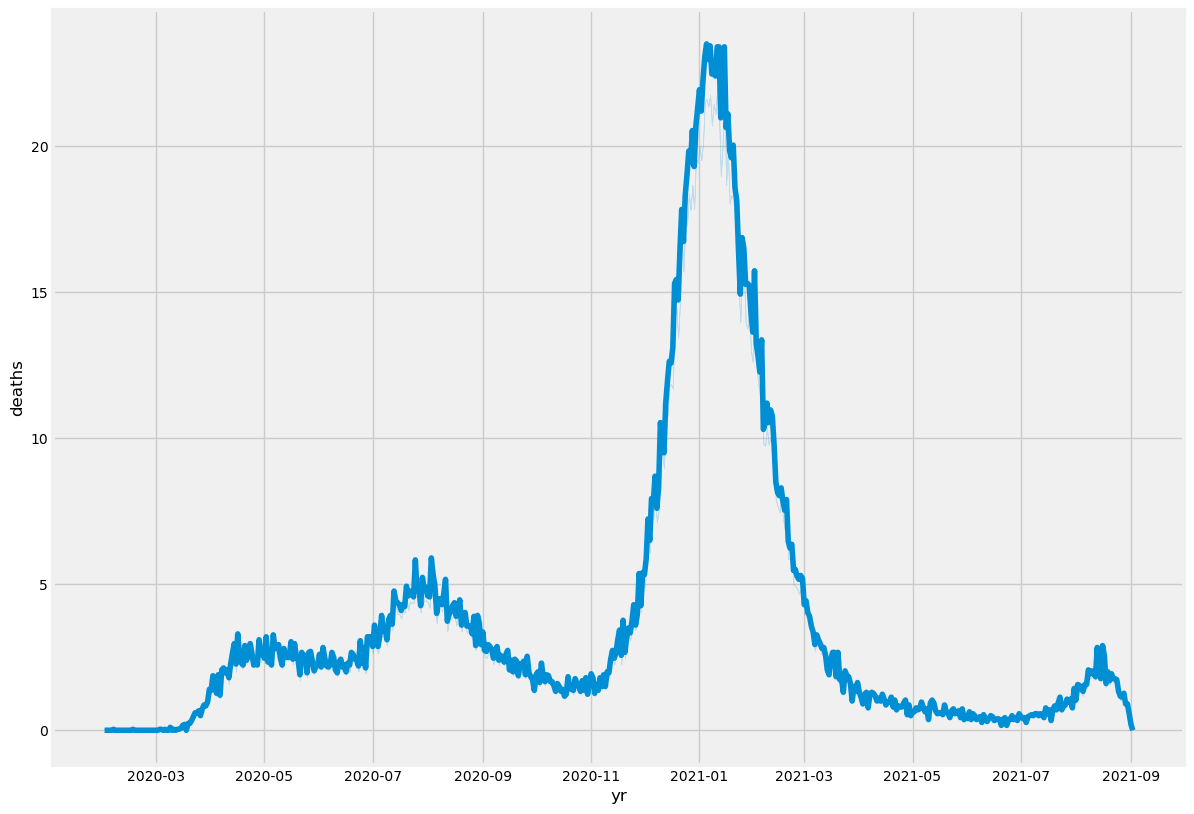

In [79]:
plt.figure(figsize = (13,10), dpi = 100)

sns.lineplot('yr','deaths', data = df_sub, ci = False);

In [80]:
df_sub[df_sub.duplicated()].count() # this is not surprising since the data has many 

deaths    34539
dtype: int64

# 3. Time Series Decomposition

In [81]:
decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive', period = 1)

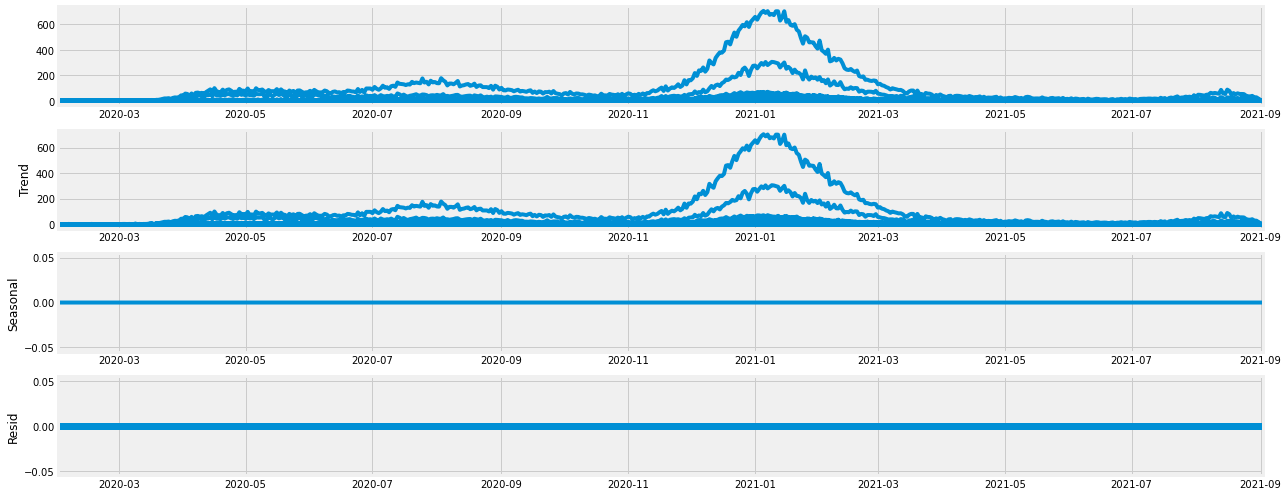

In [82]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

decomposition.plot()
plt.show()

**Comment**

The decomposition shows that the trend is similar to the actual plot. Seasonality and noise are not visible. This may be due to the limited time range of the data. Although there are major fluctuations in the data, noice seems to be flat. 


# 4. Testing for Stationarity

In [83]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['deaths'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.348795e+01
p-value                        3.147027e-25
Number of Lags Used            5.200000e+01
Number of Observations Used    3.474700e+04
Critical Value (1%)           -3.430538e+00
Critical Value (5%)           -2.861623e+00
Critical Value (10%)          -2.566814e+00
dtype: float64


**Comment**

Since the test statistic is larger than the critical values of 5%, we cannot reject the null hypothesis, i.e. the data is confirmed to be statistically non-stationary.

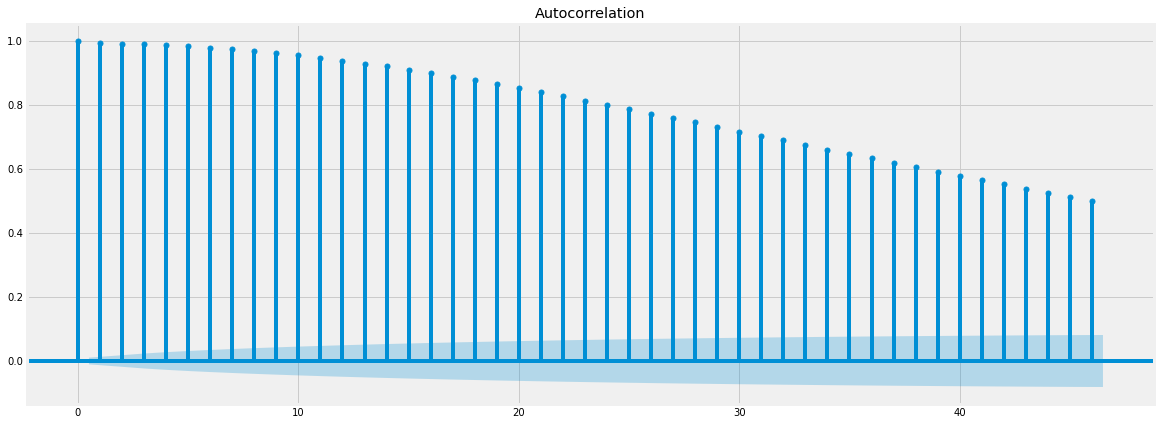

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sub)
plt.show()

# 5. Stationarizing the Dataset

In [85]:
df_diff = df_sub - df_sub.shift(1)

In [86]:
df_diff.dropna(inplace = True)

In [87]:
df_diff.shape

(34799, 1)

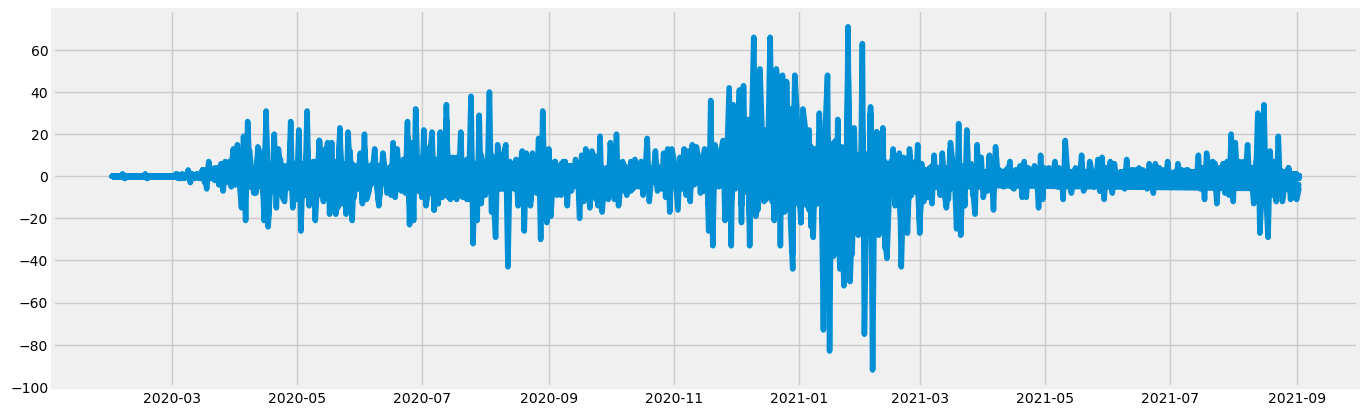

In [88]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff);

In [89]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   -28.836546
p-value                            0.000000
Number of Lags Used               52.000000
Number of Observations Used    34746.000000
Critical Value (1%)               -3.430538
Critical Value (5%)               -2.861623
Critical Value (10%)              -2.566814
dtype: float64


**Comment**

The test statistic is smaller than the critical value of 5%

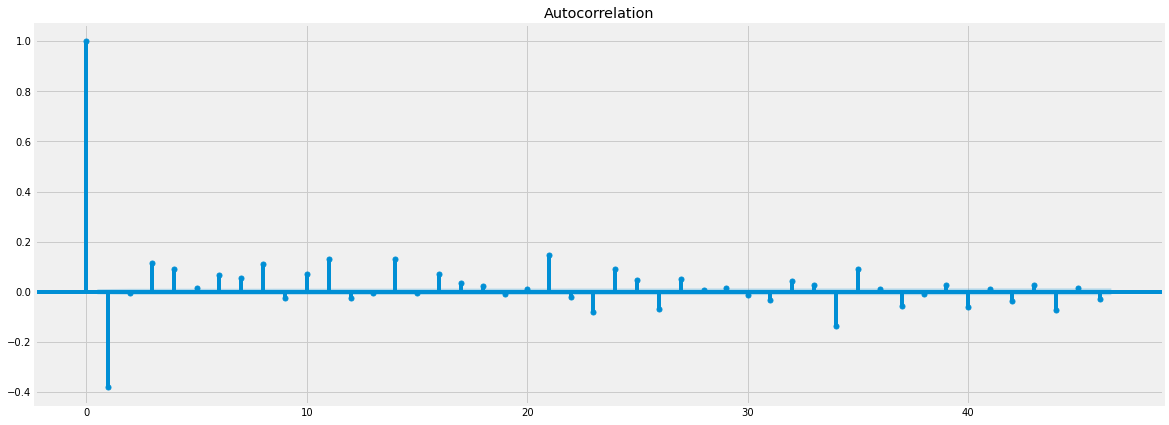

In [90]:
plot_acf(df_diff)
plt.show()

**Comment**

Negative values may be affecting the results, they will be deleted in the next section.

# 6. Repeated Test

In [91]:
df_diff = df_diff[df_diff >= 0]

In [92]:
df_diff.dropna(inplace = True)

In [93]:
df_diff.shape

(28892, 1)

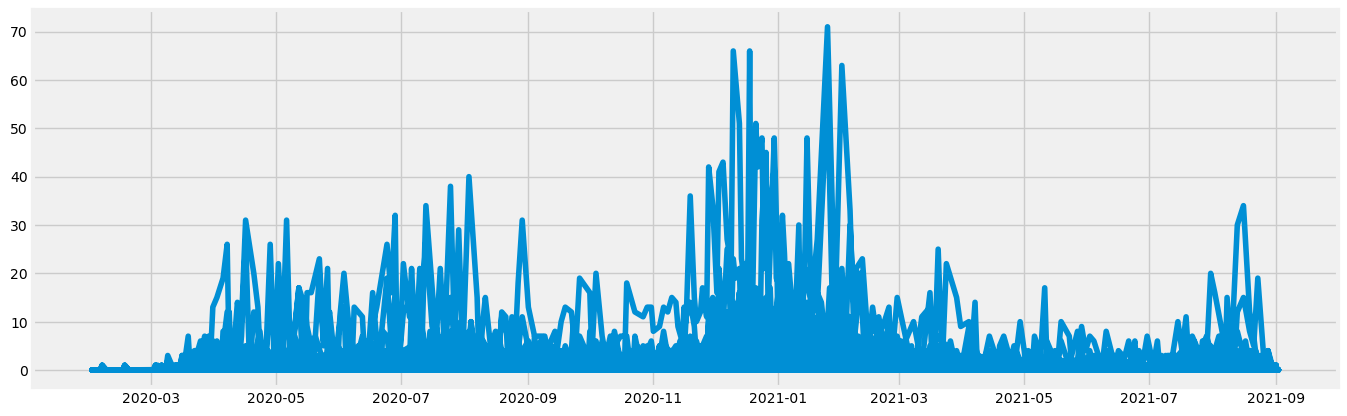

In [94]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff);

In [95]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.183331e+01
p-value                        7.897286e-22
Number of Lags Used            5.000000e+01
Number of Observations Used    2.884100e+04
Critical Value (1%)           -3.430577e+00
Critical Value (5%)           -2.861640e+00
Critical Value (10%)          -2.566823e+00
dtype: float64


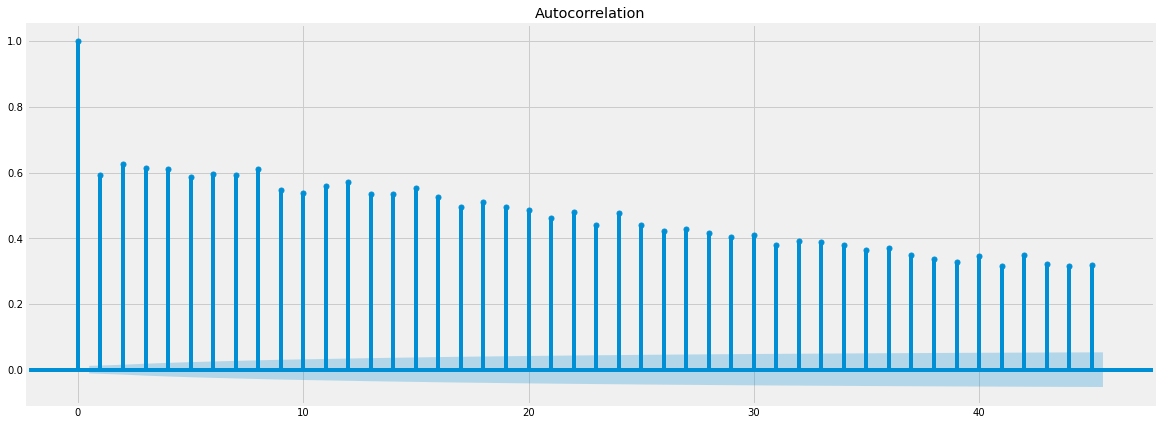

In [96]:
plot_acf(df_diff)
plt.show()